# Hyper-parameter selection

In this notebook we carry out an experiment to identify the best hyper-parameters for our network.

This notebook builds on the results of overfitting_experimentation.ipynb:
- We will use regularization, dropount and weight constraints for our models.
- We will use image generators with rotation and shift for image data preprocessing.
- We will focus on models in the low-complexity end of CNNs. This means  we will 
    - no more than 2 convolutional layers
    - no more than 1000 Neurons in fully connected layers
    - no more than 2 fully connected layers.

To find the best network structure, we will experiment with different configurtations of fully connected and convolutional layers. We will perform a Grid Search to ifentify the best structure. 

But first .. let's do the imports.

In [1]:
# correct working directory only once 
if not "working_directory_corrected" in vars():
    %cd ..
    working_directory_corrected = True

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

c:\Users\frank\Documents\Teaching\LU\Spring2023\Machine Learning² Unit\Machine Learning Example Project


## Grid Search

For the grid search we will test all combinations of the following options:
- Convolutional Layers:
     - We will test one convolutional layer with 8, 16, 32 and 64 patterns
     - We will test two convolutional layers with a 8, 16, 32 and 64 patterns in the first layer and half as many in the second layer.
- Fully Connected Layer:
     - We will test one fully connected layer with 10,25,50,100,250,500 and 1000 neurons.
     - We will test two fully connected layers with 10,25,50,100,250,500 and 1000 neurons in each layer.

Overall, this means our grid search will test 8*13 = 104 different configurations.

As noted in our overfitting experiments, 10 runs per configuration still lead to some variation in results. For this reason, we will further increase the number of times we learn each configuration. Furthermore, we are concerned about the train/test split influencing our results. For this reason, we use cross validation (with 5 folds) to receive more robust results.  Overall, each configuration will be learned five times for each of the five folds. This means, we will learn each configuration 25 times.

This means, the grid search will learn a machine learning model 104*25 = 3000 times. Depending on the machine this experiment runs on, this may take hours or even days. For this reason, we will not do this in the notebook environment. Instead, we have defined the script *scripts/hyper_parameter_selection.py* that will execute the experiment. Preferrably, this script is run on a cloud server. 

It stores results in a file which we can load and observe in this jupyter notebook. 

## Results

The results of executing the grid search is stored in pickle files in the folder *evaluation/experiment_records*. The results of the above described grid search is stored in *grid_search_results.pickle*.

Let's load the results.

In [2]:
filename = "evaluation/experiment_records/grid_search_results.pickle"
results = pickle.load(open(filename,"rb"))
results = list(results.values())
results_df = pd.DataFrame(results,columns=["CNN","ANN","Hamming"])
results_df["ANN"] = results_df['ANN'].astype(str)
results_df["CNN"] = results_df['CNN'].astype(str)


For conveniences sake we converted the results into a data frame with three columns:
- CNN: the configuration of the convolutional part of the network
- ANN: the configuration of the fully connected part of the network
- Hamming: The average hamming score of all experiments

To find the best configuration, we sort the list for the hamming score and have a look at the first twenty results.

In [4]:

results_df.sort_values(by = "Hamming", ascending = False, inplace = True, ignore_index=True)

results_df.head(20)


,CNN,ANN,Hamming
0,[16],[250],0.2164
1,"[64, 32]",[250],0.2160
2,[16],"[100, 100]",0.2156
3,"[32, 16]",[250],0.2152
4,"[16, 8]",[250],0.2116
5,[64],[250],0.2112
6,"[32, 16]",[100],0.2100
7,[32],[250],0.2100
8,[8],[500],0.2096
9,[32],[500],0.2092


We can also take a look at the last 20 results to get information on what did not work well.

In [5]:
results_df.tail(20)

,CNN,ANN,Hamming
92,"[64, 32]","[25, 25]",0.1208
93,[64],[25],0.1168
94,[16],[10],0.1164
95,"[64, 32]",[25],0.1152
96,"[8, 4]",[10],0.1032
97,"[64, 32]","[10, 10]",0.1012
98,"[64, 32]",[10],0.0992
99,[8],"[10, 10]",0.0988
100,[64],"[25, 25]",0.0988
101,[64],[10],0.0984


In addition, let's plot the average hamming score for the different ANN and CNN configurations to better judge how well they perform.

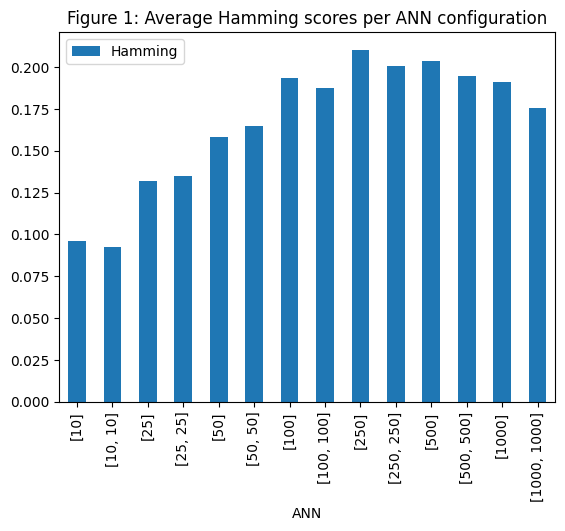

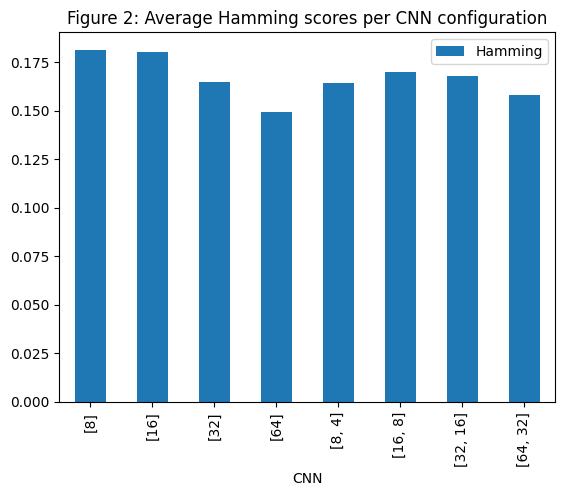

In [16]:


averages_ann_list = []
for value in ["[10]","[10, 10]", "[25]","[25, 25]", "[50]", "[50, 50]", "[100]","[100, 100]", "[250]","[250, 250]", "[500]","[500, 500]", "[1000]", "[1000, 1000]" ]:
    hammings = results_df.loc[results_df['ANN'] == value]["Hamming"]
    averages_ann_list.append((value, hammings.mean()))

averages_ann_df = pd.DataFrame(averages_ann_list,columns=["ANN","Hamming"])
averages_ann_df.plot.bar(x="ANN", y=["Hamming"], rot=90, title="Figure 1: Average Hamming scores per ANN configuration");
plot.show(block=True);


averages_cnn_list = []
for value in ["[8]","[16]","[32]","[64]","[8, 4]","[16, 8]","[32, 16]", "[64, 32]"]:
    hammings = results_df.loc[results_df['CNN'] == value]["Hamming"]
    averages_cnn_list.append((value, hammings.mean()))

averages_cnn_df = pd.DataFrame(averages_cnn_list,columns=["CNN","Hamming"])
averages_cnn_df.plot.bar(x="CNN", y=["Hamming"], rot=90, title="Figure 2: Average Hamming scores per CNN configuration");
plot.show(block=True);


## Discussion

Looking at these configurations we can make a few observations:
- The top results are all very close by. As we know from previous experiences, the variation in hamming score when learning a model can be around 0.01. Although this variation has hopefully been reduced by using cross validation and 25 samples overall, we still assume that the first 15 results all are sufficiently close to each other that they would all be good choices.
- The configuration of fully connected layers seems to matter a lot more than the convolutional layers. The variation in average hamming score is a lot more pronounced in Figure 1 than in Figure 2. 
- The number of fully connected layers seems to matter less than the neurons in the fully connected layers. For all configurations in Figure 2, the two-layer configuration was performing similarly to the one-layer configuration and usually slightly worse. 
- 250 seems to be the optimal number of neurons for fully connected Layers. This is supported by Figure 1, where this configuration had the highest average hamming score and by the fact that seven out of the 8 configurations with 250 neurons made it into the top 15 configurations. 
- Having two convolutional layers does not seem to bring a significant advantage.





- Networks with one hidden layer with 250 neurons seem to perform consistently well. Seven out of the eight variations of this configuration have made it to the top 15 results. 
The other top 15 results are configurations of neighboring complexity (100 neurons, 500 neurons and two layers with 100, 250 or 500 neurons).
- 

Looking at the top ten configurations, we can make the following observations:

The configuration that performed best was the following configuration:
- CNN: 1 layer with 16 patterns
- ANN: 1 layer with 250 neurons

We will use this configuration for our evaluation.


TODO: fill this with content after experiment has run through



## Conclusions

We have identified that the best performing model is one with the following configurations.
- CNN: 1 layer with 16 patterns
- ANN: 1 layer with 250 neurons